<h2 align="center">Introduction</h2>



Wind energy is produced in varying power due to the movement of air between an unevenly heated atmosphere and the irregular surface of the earth. 

The power of wind lets it exert force, create movement, and transfer energy to elements within the environment. 

Wind energy provides a clean, sustainable solution to our energy problems. It can be used as an alternative to fossil fuels in generating electricity, without the direct emission of greenhouse gases. And there will always be wind; it is inexhaustible and renewable.


A wind turbine produces electricity by using the kinetic or moving energy of wind to create motion. When there is a satisfactory level of power in the wind it can exert a force, causing a the rotor to spin which when coupled to a generator converts the rotation into electricity.

A wind turbine operates on a simple principle: The wind turns the blades, spins a drive shaft, fed through a gearbox, delivers the motion required for a generation unit to produce electricity by using the motion to create a magnetic field and generate an electrical current.

The electricity produced is collected through underground cables that connect each turbine to a substation, where the power is transferred to the local power distribution network to be used by local homes and businesses, or enters the national power network where it is rerouted to areas of high electricity demand, such as: urban centres.

Following the objective of the project, I will use machine learning to predict wind turbine power output and for that I will use k-NN, firstly.

The k-nearest neighbors algorithm (k-NN) is a non-parametric machine learning used for classification and regression. The input consist of the "k" closest training examples in feature space and your output depends on whether k-NN is used for classification or regression. Let show the code...

In [1]:
import pandas as pd # import library Pandas and renamed it as pd
import matplotlib.pyplot as plt # import library matplotlib.pyplot and renamed it as plt
from scipy import stats
from pandas.plotting import scatter_matrix
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import joblib

In [2]:
# I used pandas to read the file
power = pd.read_csv("powerproduction.csv")

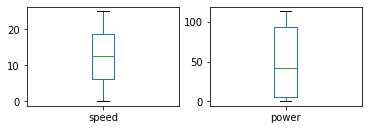

In [3]:
power.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [4]:
# Describe my data
power.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


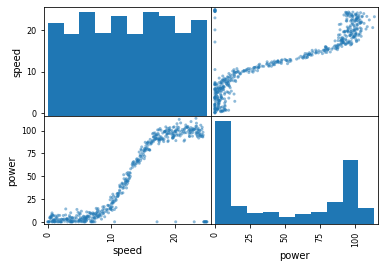

In [5]:
scatter_matrix(power)
plt.show()

In [6]:
# Show me some information about the data
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


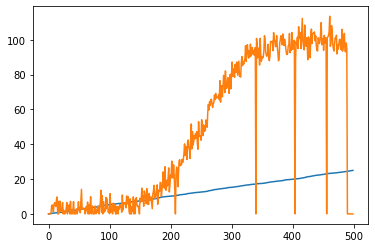

In [7]:
plt.plot(power);

In [8]:
power.shape

(500, 2)

<h1 align="center">Cleaning  the data</h1>

Data cleansing is also important because it improves your data quality and in doing so, increases overall productivity. When you clean your data, all outdated or incorrect information is gone – leaving you with the highest quality information.

In [9]:
n_power = power[(power["speed"] > 0) & (power["power"] > 0)]

In [10]:
# Describe the data cleaned
n_power.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


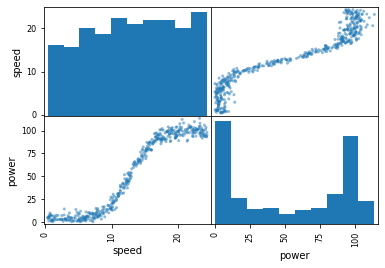

In [11]:
# We can compare with the first plot and see the difference
scatter_matrix(n_power)
plt.show()

In [12]:
# Information ablout the data cleaned
n_power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 5 to 489
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   451 non-null    float64
 1   power   451 non-null    float64
dtypes: float64(2)
memory usage: 10.6 KB


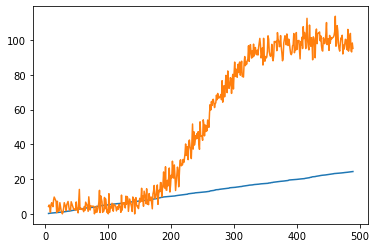

In [13]:
plt.plot(n_power);

In [14]:
n_power.shape

(451, 2)

<h1 align="center">Linear Regression</h1>

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

Before attempting to fit a linear model to observed data, a modeler should first determine whether or not there is a relationship between the variables of interest. This does not necessarily imply that one variable causes the other (for example, higher SAT scores do not cause higher college grades), but that there is some significant association between the two variables. A scatterplot can be a helpful tool in determining the strength of the relationship between two variables. If there appears to be no association between the proposed explanatory and dependent variables (i.e., the scatterplot does not indicate any increasing or decreasing trends), then fitting a linear regression model to the data probably will not provide a useful model. A valuable numerical measure of association between two variables is the correlation coefficient, which is a value between -1 and 1 indicating the strength of the association of the observed data for the two variables.

In [15]:
x = power.speed
y = power.power

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [ ]:
X = n_power.speed
Y = n_power.power

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(X, Y)

def myfunc(X):
  return slope * X + intercept

mymodel = list(map(myfunc, X))

plt.scatter(X, Y)
plt.plot(X, mymodel)
plt.show()

In [ ]:
# For linear models, the intercept is the value of the linear predictor when all covariates are zero. 
# In linear regression, this is equivalent to the y-intercept of the line of best fit.
# In logistic regression, it is the log odds of the baseline group.
intercept

In [ ]:
# The slope of the line is calculated as the change in y divided by change in x.
slope

In [ ]:
# coefficient of correlation
r

In [ ]:
# p - probability
p

In [ ]:
# Standard error is the measurement of how dispersed a sample’s means are from the population mean.
std_err

In [ ]:
Guess_a_number = 23

In [ ]:
speed = myfunc(Guess_a_number)
speed

In [ ]:
joblib.dump(myfunc, "models/regression.pkl")
print("Support regression X saved as regression.pkl")

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(X, Y)

def myfunc(X):
  return slope * X + intercept

mymodel = list(map(myfunc, X))

plt.scatter(X, Y)
plt.plot(X, mymodel)
plt.plot(speed,"r+", label="Guess Number")
plt.show()

<h1 align="center">Neural Network</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/1/10/Blausen_0657_MultipolarNeuron.png" />

Artificial neural networks (ANNs), usually simply called neural networks (NNs), are computing systems vaguely inspired by the biological neural networks that constitute animal brains.

An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron that receives a signal then processes it and can signal neurons connected to it. The "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called edges. Neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times.

In [ ]:
# Get just values form the data
ds = n_power.values

In [ ]:
X = ds[:,0:1]

In [ ]:
Y = ds[:,1]

In [ ]:
# train the data
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3) 

I constructed  neural network with input layer, a hidden layer with a hundred neurons and the output layer.

In [ ]:
# creeating a sequential nural network model
model = keras.models.Sequential() 
model.add(keras.layers.Dense(100, input_shape=(1,), activation="sigmoid", kernel_initializer='ones', bias_initializer='zeros'))
model.add(keras.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

In [ ]:
# Train the network using the training data.
model.fit(X_train, Y_train, epochs=452, validation_data=(X_val_and_test, Y_val_and_test))

In [ ]:
model.save("models/neural.h5")
print("Neural network model saved as neural.h5")

In [ ]:
# Now you can guess a value of wind and see the predict
w = [[24.399]]
print(model.predict(w))

<h1 align="center">Conclusion</h1>

In this project, I used the data made available in Moodle by the lecturer and started to manipulate them. First, extract the data using panda, I created some graphs and showed the characteristics of the data by printing "describe", "info" and "shape".

In the second stage, I performed a cleaning of the data and with that reduced the data from 500 to 451, giving more quality to many data; then I print the graphs and data characteristics again, making it easy to compare data and clean data.

I used linear regression to model the relationship between "Wind" and "Power" by adjusting a linear equation on observed data. We can verify through the value of "r = 0.94788 .." that there is a relationship between the variables.

Finishing the project I tried to create a Neural Network composed of three layers.

<h1 align="center">Reference</h1>

1 - StackExchange, Machine learning, https://stats.stackexchange.com/questions/380201/machine-learning-use-of-intercept-in-regression (Accessed 18 Dec. 2020)
    
2 - DeepAi, Standard error, https://deepai.org/machine-learning-glossary-and-terms/standard-error (Accessed 28 Dec. 2020)
    
3 - Matplotlib, Matplotlib, https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html (Accessed 26 Dec. 2020)
    
4 - W3School, Linear Regression https://www.w3schools.com/python/python_ml_linear_regression.asp (Accessed 26 Dec. 2020)
    
5 - ESB, Wind Energy https://www.esb.ie/tns/education-hub/future-energy/wind-energy#ep-c5589593-87d4-4924-8419-79a2c4ea3746 (Accessed 04 Jan. 2021)

6 - SEAI, Wind Energy, https://www.seai.ie/technologies/wind-energy/ (Accessed 04 Jan. 21)

7 - Wikipedia, k-NN Algorithm, https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm (Accessed 16 Dec. 2020)

8 - Wikipedia, Neuron, https://en.wikipedia.org/wiki/Neuron (Accessed 04 Jan. 21)

9 - Blue-pencil, Data Cleasing, https://www.blue-pencil.ca/data-cleansing-what-is-it-and-why-is-it-important/ (Accessed 04 Jan. 21)

10 - Stat Yale, Linear Regression, http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm (Accessed 20 Dec. 2020)

11 - Scipy, Linear Regressionhttps://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

12 - Medium.com, Machine Learning: Trying to predict a numerical value, https://srnghn.medium.com/machine-learning-trying-to-predict-a-numerical-value-8aafb9ad4d36 (Accessed 20 Dec. 2020)

13 - Machine Learning Mastery, A Gentle Introduction to Model Selection for Machine Learning, https://machinelearningmastery.com/a-gentle-introduction-to-model-selection-for-machine-learning/ (Accessed 22 Nov. 2020)